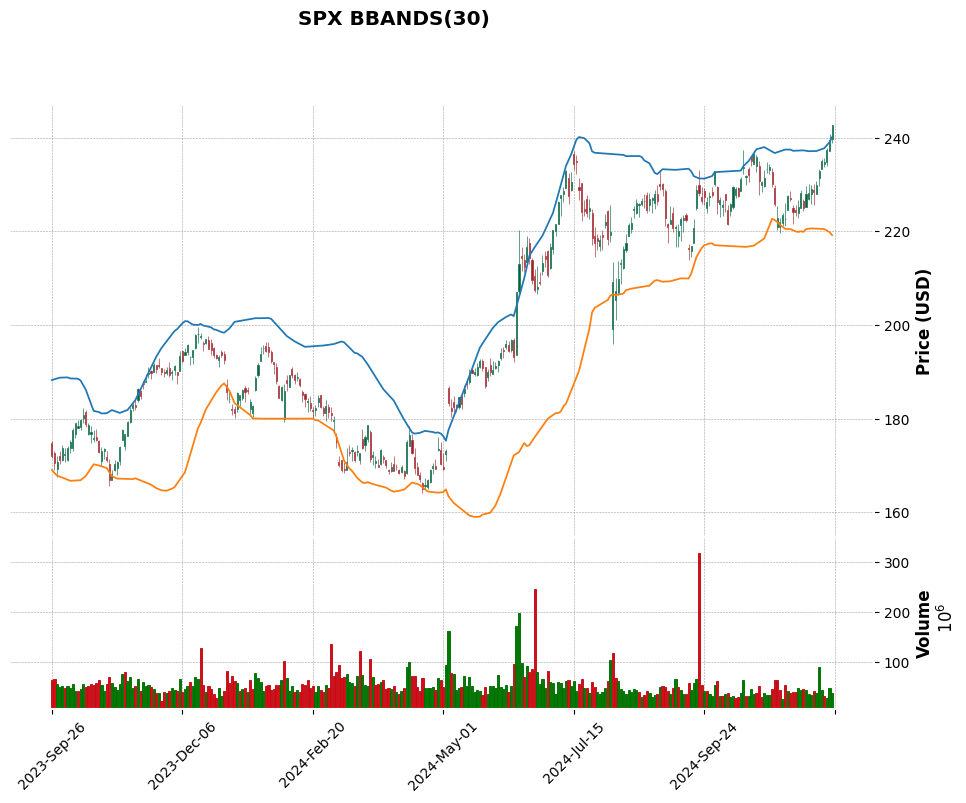

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
from finta import TA

ohlc = pd.read_csv("../csv/AAPL_from_2021.csv",index_col="timestamp",parse_dates=True)

bbands = TA.BBANDS(ohlc, 30)

# cherry pick what to show on the chart
bands_plot = pd.concat([bbands.BB_UPPER, bbands.BB_LOWER], axis=1)

apd = mpf.make_addplot(bands_plot.tail(300))


mpf.plot(ohlc.tail(300), type='candle', style='charles',
        title='SPX BBANDS(30)',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

timestamp
2017-01-03 05:00:00+00:00           NaN
2017-01-04 05:00:00+00:00           NaN
2017-01-05 05:00:00+00:00           NaN
2017-01-06 05:00:00+00:00           NaN
2017-01-09 05:00:00+00:00           NaN
                                ...    
2024-11-26 05:00:00+00:00    227.705333
2024-11-27 05:00:00+00:00    228.519333
2024-11-29 05:00:00+00:00    229.176000
2024-12-02 05:00:00+00:00    230.018000
2024-12-03 05:00:00+00:00    231.246000
Name: 15 period SMA, Length: 1993, dtype: float64

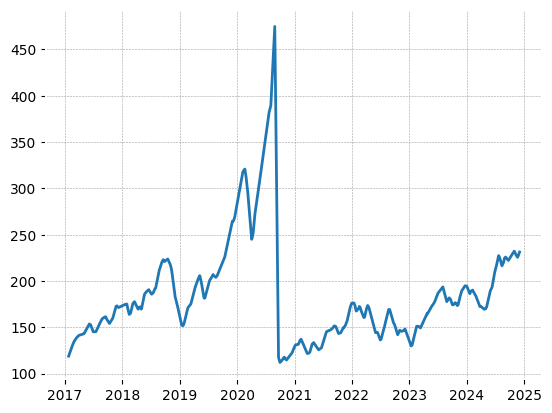

In [9]:
sma = TA.SMA(ohlc,15)
plt.plot(sma)
sma

In [14]:
rsi = TA.RSI(ohlc)

timestamp
2017-01-03 05:00:00+00:00          NaN
2017-01-04 05:00:00+00:00     0.000000
2017-01-05 05:00:00+00:00    83.015075
2017-01-06 05:00:00+00:00    94.280880
2017-01-09 05:00:00+00:00    96.410794
2017-01-10 05:00:00+00:00    96.563916
2017-01-11 05:00:00+00:00    97.240166
2017-01-12 05:00:00+00:00    83.426149
2017-01-13 05:00:00+00:00    78.389233
2017-01-17 05:00:00+00:00    83.340893
Name: 14 period RSI, dtype: float64

In [16]:
macd = TA.MACD(ohlc)
macd.tail(10)

,MACD,SIGNAL
timestamp,,
2024-11-19 05:00:00+00:00,-0.485303,-0.620358
2024-11-20 05:00:00+00:00,-0.269184,-0.550123
2024-11-21 05:00:00+00:00,-0.135083,-0.467115
2024-11-22 05:00:00+00:00,0.079213,-0.357850
2024-11-25 05:00:00+00:00,0.485523,-0.189175
2024-11-26 05:00:00+00:00,0.973024,0.043265
2024-11-27 05:00:00+00:00,1.333511,0.301314
2024-11-29 05:00:00+00:00,1.792200,0.599491
2024-12-02 05:00:00+00:00,2.311433,0.941880


In [18]:
sma_long = TA.SMA(ohlc,200)
sma_long.tail(20)

timestamp
2024-11-05 05:00:00+00:00    202.45250
2024-11-06 05:00:00+00:00    202.59020
2024-11-07 05:00:00+00:00    202.75510
2024-11-08 05:00:00+00:00    202.91905
2024-11-11 05:00:00+00:00    203.07810
2024-11-12 05:00:00+00:00    203.24060
2024-11-13 05:00:00+00:00    203.42600
2024-11-14 05:00:00+00:00    203.64510
2024-11-15 05:00:00+00:00    203.83580
2024-11-18 05:00:00+00:00    204.04665
2024-11-19 05:00:00+00:00    204.24965
2024-11-20 05:00:00+00:00    204.44815
2024-11-21 05:00:00+00:00    204.64370
2024-11-22 05:00:00+00:00    204.85145
2024-11-25 05:00:00+00:00    205.07155
2024-11-26 05:00:00+00:00    205.31110
2024-11-27 05:00:00+00:00    205.56055
2024-11-29 05:00:00+00:00    205.82645
2024-12-02 05:00:00+00:00    206.10510
2024-12-03 05:00:00+00:00    206.40680
Name: 200 period SMA, dtype: float64

In [21]:
ohlc["sma15"] = sma
ohlc["sma200"] = sma_long
ohlc["rsi"] = rsi
ohlc["macd"] = macd["MACD"]
ohlc["macd_signal"] = macd["SIGNAL"]
ohlc.tail(10)

,symbol,open,high,low,close,volume,trade_count,vwap,sma15,rsi,macd,macd_signal,sma200
timestamp,,,,,,,,,,,,,
2024-11-19 05:00:00+00:00,AAPL,226.980,230.1600,226.6600,228.28,36211774.0,365242.0,228.651147,225.642667,51.986986,-0.485303,-0.620358,204.24965
2024-11-20 05:00:00+00:00,AAPL,228.060,229.9300,225.8900,229.00,35230059.0,357481.0,228.019292,225.569333,53.265027,-0.269184,-0.550123,204.44815
2024-11-21 05:00:00+00:00,AAPL,228.880,230.1550,225.7103,228.52,42108327.0,431685.0,228.439064,225.743333,52.266177,-0.135083,-0.467115,204.64370
2024-11-22 05:00:00+00:00,AAPL,228.060,230.7199,228.0600,229.87,38168252.0,380624.0,229.692547,226.207333,54.831661,0.079213,-0.357850,204.85145
2024-11-25 05:00:00+00:00,AAPL,231.460,233.2450,229.7400,232.87,90152832.0,510698.0,232.405006,226.931333,59.979214,0.485523,-0.189175,205.07155
2024-11-26 05:00:00+00:00,AAPL,233.330,235.5700,233.3300,235.06,45986189.0,450015.0,234.821331,227.705333,63.269969,0.973024,0.043265,205.31110
2024-11-27 05:00:00+00:00,AAPL,234.465,235.6900,233.8101,234.93,33498439.0,339860.0,234.806483,228.519333,62.939132,1.333511,0.301314,205.56055
2024-11-29 05:00:00+00:00,AAPL,234.805,237.8100,233.9700,237.33,28481377.0,268955.0,236.570409,229.176000,66.429181,1.792200,0.599491,205.82645
2024-12-02 05:00:00+00:00,AAPL,237.270,240.7900,237.1600,239.59,48129019.0,468849.0,239.520954,230.018000,69.355676,2.311433,0.941880,206.10510


In [73]:
import sklearn.preprocessing
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

ohlc["open"] = min_max_scaler.fit_transform(ohlc.open.values.reshape(-1,1))
ohlc["close"] = min_max_scaler.fit_transform(ohlc.close.values.reshape(-1,1))
ohlc["high"] = min_max_scaler.fit_transform(ohlc.high.values.reshape(-1,1))
ohlc["low"] = min_max_scaler.fit_transform(ohlc.low.values.reshape(-1,1))
ohlc["vwap"] = min_max_scaler.fit_transform(ohlc.vwap.values.reshape(-1,1))
ohlc["sma15"] = min_max_scaler.fit_transform(ohlc.sma15.values.reshape(-1,1))
ohlc["sma200"] = min_max_scaler.fit_transform(ohlc.sma200.values.reshape(-1,1))
ohlc["rsi"] = min_max_scaler.fit_transform(ohlc.rsi.values.reshape(-1,1))
ohlc["macd"] = min_max_scaler.fit_transform(ohlc.macd.values.reshape(-1,1))

# data = ohlc[['open','close','low','high','vwap','sma15','sma200','rsi','macd']].values

data = ohlc[['open','close','low','high']].values

In [74]:
seq_len=20
sequences=[]
for index in range(len(data) - seq_len): 
  sequences.append(data[index: index + seq_len])
sequences= np.array(sequences)

In [75]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

valid_set_size = int(np.round(valid_set_size_percentage/100*sequences.shape[0]))  
test_set_size  = int(np.round(test_set_size_percentage/100*sequences.shape[0]))
train_set_size = sequences.shape[0] - (valid_set_size + test_set_size)

x_train = sequences[:train_set_size,:-1,:]
y_train = sequences[:train_set_size,-1,:]
    
x_valid = sequences[train_set_size:train_set_size+valid_set_size,:-1,:]
y_valid = sequences[train_set_size:train_set_size+valid_set_size,-1,:]
    
x_test = sequences[train_set_size+valid_set_size:,:-1,:]
y_test = sequences[train_set_size+valid_set_size:,-1,:]

In [76]:
import torch
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  

x_train = torch.tensor(x_train).float().to(device)
y_train = torch.tensor(y_train).float().to(device)

x_valid = torch.tensor(x_valid).float().to(device)
y_valid = torch.tensor(y_valid).float().to(device)

train_dataset = TensorDataset(x_train,y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

valid_dataset = TensorDataset(x_valid,y_valid)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=True)



In [77]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.lstm  = nn.LSTM(4,64,batch_first=True)
        self.fc    = nn.Linear(64,4)
        
    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        x = self.fc(hidden)
        return x

model = NeuralNetwork()

#push to cuda if available

model = model.to(device)

In [78]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
mse = nn.MSELoss()

In [79]:
def train(dataloader):
    epoch_loss = 0
    model.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

def evaluate(dataloader):
    epoch_loss = 0
    model.eval()  
    
    with torch.no_grad():
      for batch in dataloader:   
          x,y= batch
          pred = model(x)
          loss = mse(pred[0],y)              
          epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

In [80]:
n_epochs = 50
best_valid_loss = float('inf')

for epoch in range(n_epochs):

    train_loss = train(train_dataloader)
    valid_loss = evaluate(valid_dataloader)
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model, 'saved_weights.pt')

    print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss:.5f}')
    print(f'\tVal Loss: {valid_loss:.5f}\n')

Epoch  1
	Train Loss: 1.16827
	Val Loss: 0.00129

Epoch  2
	Train Loss: 0.14544
	Val Loss: 0.00014

Epoch  3
	Train Loss: 0.09709
	Val Loss: 0.00011

Epoch  4
	Train Loss: 0.07726
	Val Loss: 0.00028

Epoch  5
	Train Loss: 0.06708
	Val Loss: 0.00010

Epoch  6
	Train Loss: 0.05989
	Val Loss: 0.00013

Epoch  7
	Train Loss: 0.05814
	Val Loss: 0.00010

Epoch  8
	Train Loss: 0.05064
	Val Loss: 0.00013

Epoch  9
	Train Loss: 0.04858
	Val Loss: 0.00020

Epoch  10
	Train Loss: 0.04569
	Val Loss: 0.00009

Epoch  11
	Train Loss: 0.05019
	Val Loss: 0.00061

Epoch  12
	Train Loss: 0.06857
	Val Loss: 0.00005

Epoch  13
	Train Loss: 0.04081
	Val Loss: 0.00006

Epoch  14
	Train Loss: 0.03931
	Val Loss: 0.00011

Epoch  15
	Train Loss: 0.03894
	Val Loss: 0.00006

Epoch  16
	Train Loss: 0.04130
	Val Loss: 0.00005

Epoch  17
	Train Loss: 0.03791
	Val Loss: 0.00022

Epoch  18
	Train Loss: 0.03979
	Val Loss: 0.00007

Epoch  19
	Train Loss: 0.03693
	Val Loss: 0.00024

Epoch  20
	Train Loss: 0.03844
	Val Loss

/tmp/ipykernel_34320/244733754.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model=torch.load('saved_weights.pt').to("cpu")
/tmp/ipykernel_34320/244733754.py:3: UserWa

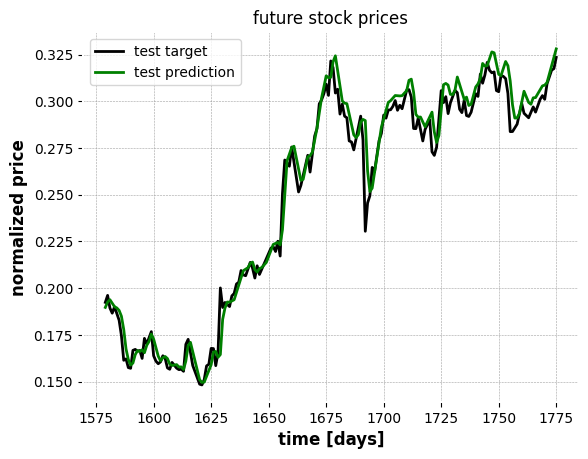

In [87]:
model=torch.load('saved_weights.pt').to("cpu")

x_test= torch.tensor(x_test).float().to("cpu")

with torch.no_grad():
  y_test_pred = model(x_test)

y_test_pred = y_test_pred.numpy()[0]

idx=0
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,idx], color='black', label='test target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,idx], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best')